In [453]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [454]:
df = pd.read_csv('Data/cardio_train.csv', sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### 2.0 - EDA uppvärmning

### a)

Text(-0.16, -0.48, '34979')

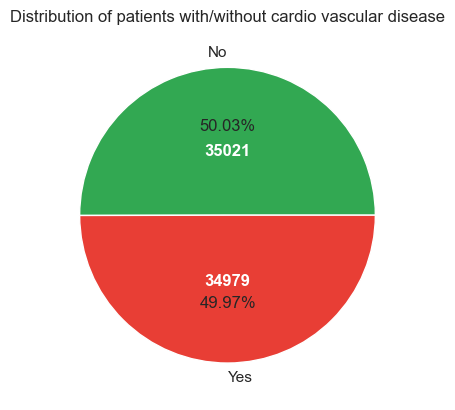

In [455]:
cardio_distribution = df['cardio'].value_counts()

# Create the pie chart
plt.pie(
    x=cardio_distribution,
    labels=['No', 'Yes'],
    autopct='%1.2f%%',
    colors=["#32a852", "#e83e35"]
);

plt.title('Distribution of patients with/without cardio vascular disease')

# Add the value count to each slice
plt.text(-0.16, 0.4, f'{cardio_distribution[0]}', color='white', fontweight='bold')
plt.text(-0.16, -0.48, f'{cardio_distribution[1]}', color='white', fontweight='bold')

### b)

Text(0.5, 1.0, 'Distribution of patient cholesterol status')

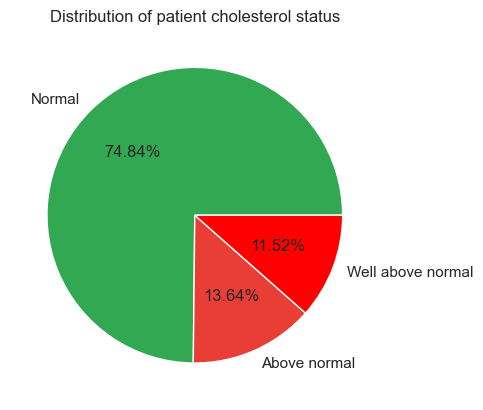

In [456]:
plt.pie(
    x=df['cholesterol'].value_counts(),
    labels=['Normal', 'Above normal', 'Well above normal'],
    colors=["#32a852", "#e83e35", 'red'],
    autopct='%1.2f%%'
);

plt.title('Distribution of patient cholesterol status')

### c)

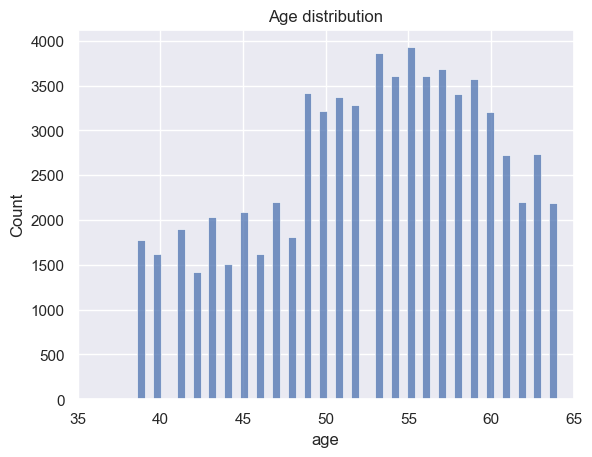

In [457]:
ax = sns.histplot(x=df['age'].div(365).astype('int'))
ax.set_title("Age distribution")
ax.set_xlim(35, 65);

### d)

Text(0.5, 1.0, 'Distribution of smokers vs none smoker')

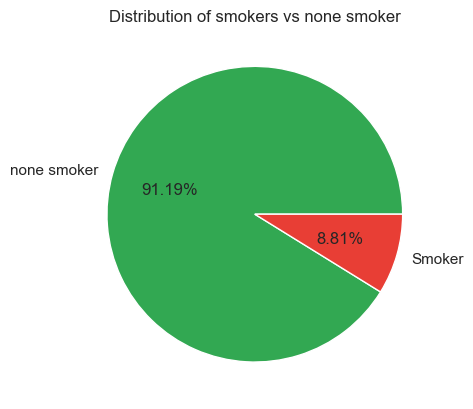

In [458]:
plt.pie(
    x=df['smoke'].value_counts(),
    labels=['none smoker', 'Smoker'],
    colors=["#32a852", "#e83e35"],
    autopct='%1.2f%%'
);

plt.title('Distribution of smokers vs none smoker')

### e)

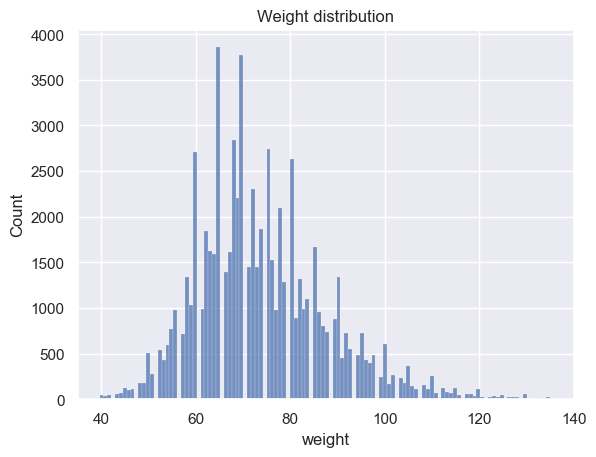

In [459]:
ax = sns.histplot(data=df, x='weight')
ax.set_title("Weight distribution")
ax.set_xlim(35, 140);

### f)

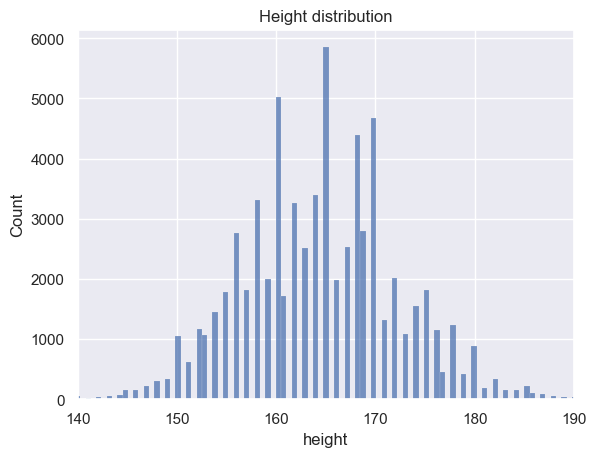

In [460]:
ax = sns.histplot(data=df, x='height')
ax.set_title("Height distribution")
ax.set_xlim(140, 190);

### g)

In [461]:
gender_cardio = df.groupby('gender', as_index=False)['cardio'].value_counts()
display(gender_cardio)

gender_cardio = gender_cardio['count']

,gender,cardio,count
0,1,0,22914
1,1,1,22616
2,2,1,12363
3,2,0,12107


In [462]:
# Female/male cardio cases divided by total patient count
female_cardio_proportion = int(gender_cardio[2] / sum(gender_cardio[0:2]) * 100)
male_cardio_proportion = int(gender_cardio[3] / sum(gender_cardio[2:4]) * 100)

test = np.array((male_cardio_proportion, female_cardio_proportion))

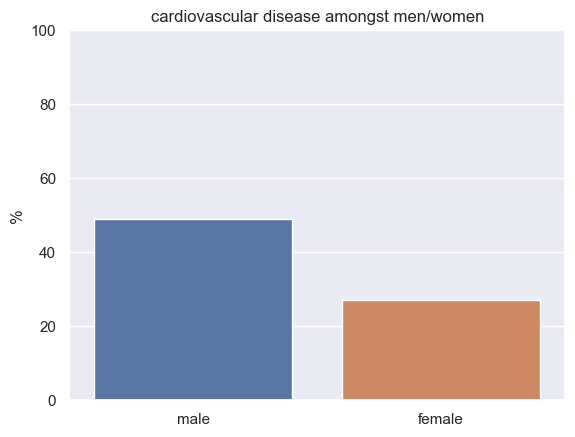

In [463]:
ax = sns.barplot(x=['male', 'female'], y=test)
ax.set_title("cardiovascular disease amongst men/women")
ax.set_ylabel("%")
ax.set_ylim(0, 100);

### 2.1.0 - Feature engineering BMI

In [464]:
# body mass (kg) / height² (meters)

bmi = df["weight"] / (df["height"] / 100)**2

# rounding it
bmi = bmi.astype(int)

df.insert(
    loc=5,
    column="bmi",
    value=bmi,
    allow_duplicates=1
)

df

,id,age,gender,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,21,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,34,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,23,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,28,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,23,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,26,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,50,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,31,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,27,135,80,1,2,0,0,0,1


### a)

##### So lets take a look at what sorta BMI numbers we've actually got. From a first glance, it appears as though BMI values <10 >75 are extraordinary. Lets do some more digging!

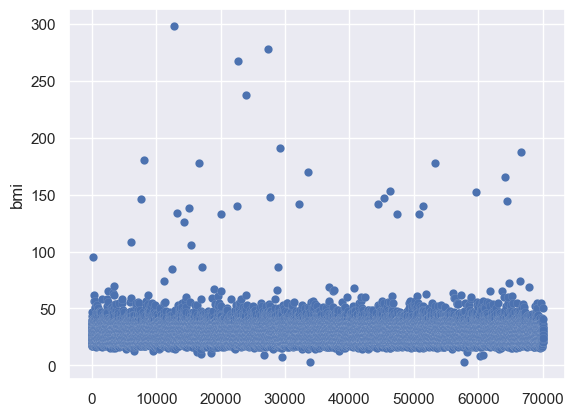

In [465]:
sns.scatterplot(df['bmi'], linewidth=0.05);

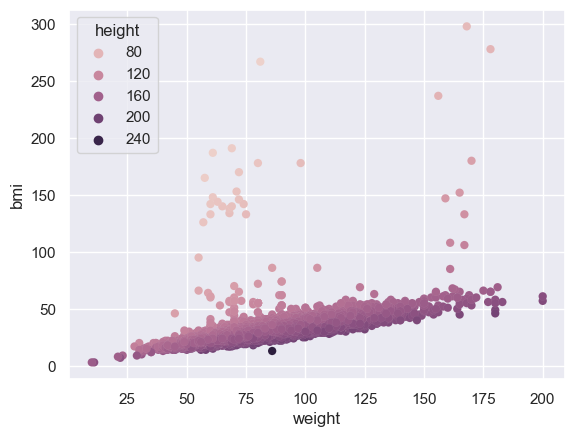

In [466]:
sns.scatterplot(data=df, y='bmi', x='weight', hue='height', linewidth=0.025);

##### Having seen some graphs and gone through the actual data for patients with BMI's <18.5 >70, i'm confident that such values are indeed outliars and or unresonable. Almost all the sources on google seem to be in general agreeance with my numbers.

In [473]:
extreme_bmis = df.loc[(df['bmi'] < 18.5) | (df['bmi'] > 70)]
extreme_bmis[['weight', 'height', 'bmi']]

,weight,height,bmi
224,55.0,76,95
6153,161.0,122,108
7598,72.0,70,146
8171,170.0,97,180
11230,90.0,110,74
12435,161.0,137,85
12770,168.0,75,298
13265,68.0,71,134
14323,57.0,67,126
15167,68.0,70,138


In [501]:
df = df.loc[(df['bmi'] >= 18.5) & (df['bmi'] <= 70)]
df

,id,age,gender,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,21,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,34,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,23,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,28,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,23,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,26,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,50,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,31,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,27,135,80,1,2,0,0,0,1


### b)

In [505]:
test = df.copy()



# define the function to assign BMI-feature values
def assign_bmi_feature(x):
    if 18.5 < x < 24.9: # normal
        return 'normal'
    elif 25 < x < 29.9: # overweight
        return 'overweight'
    elif 30 < x < 34.9: # obese (class I)
        return 'obese (class I)'
    elif 35 < x < 39.9: # obese(class II)
        return 'obese(class II)'
    elif 40 < x: # obese (class III)
        return 'obese (class III)'

# apply the function to the 'bmi' column to create the new 'BMI-feature' column

bmi_feature = test['bmi'].apply(assign_bmi_feature)
test.insert(loc=6, column='bmi-feature', value=bmi_feature, allow_duplicates=True)

test

,id,age,gender,height,weight,bmi,bmi-feature,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,21,normal,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,34,obese (class I),140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,23,normal,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,28,overweight,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,23,normal,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,26,overweight,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,50,obese (class III),140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,31,obese (class I),180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,27,overweight,135,80,1,2,0,0,0,1
